# Mini Project

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
#%%
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Figure size 300x600 with 0 Axes>

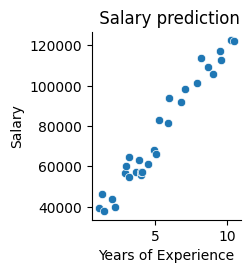

In [4]:
plt.figure(figsize=(3, 6))
sns.pairplot(data, x_vars=['YearsExperience'], y_vars=['Salary'], kind='scatter')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title(' Salary prediction')
plt.show()

In [5]:
X = data.iloc[:,:-1]
Y = data.iloc[:,1]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=10)

In [7]:
my_model = LinearRegression()
my_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


<function matplotlib.pyplot.show(close=None, block=None)>

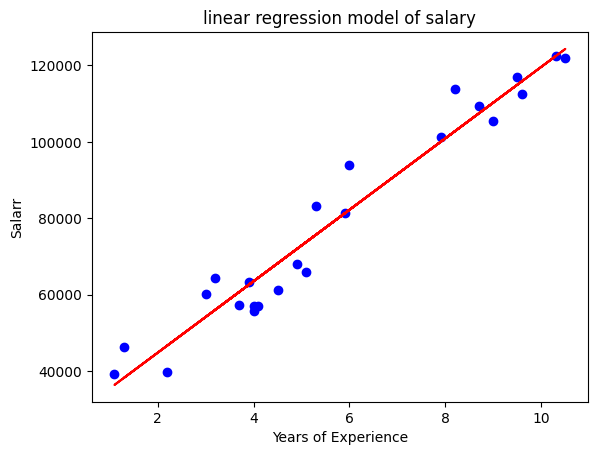

In [8]:
plt.scatter(x_train,y_train , color='blue')
plt.plot(x_train, my_model.predict(x_train), color='red')
plt.xlabel ('Years of Experience')
plt.ylabel('Salarr')
plt.title('linear regression model of salary')
plt.show

In [9]:
y_pred = my_model.predict(x_test)

<function matplotlib.pyplot.show(close=None, block=None)>

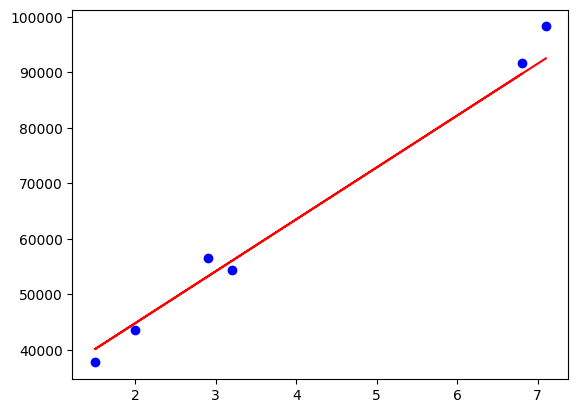

In [10]:
plt.scatter(x_test,y_test  , color='blue')
plt.plot(x_test, y_pred, color='red')

plt.show

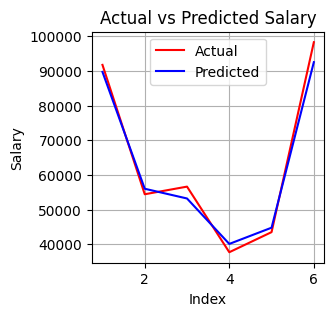

In [11]:

c = range(1, len(y_test) + 1)

plt.figure(figsize=(3, 3))
plt.plot(c, y_test, 'r-', label="Actual")
plt.plot(c, y_pred, 'b-', label="Predicted")
plt.xlabel('Index')
plt.ylabel('Salary')
plt.title("Actual vs Predicted Salary")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
MSE = mean_squared_error(y_test, y_pred)
print(MSE)
rmse = np.sqrt(MSE)
print(rmse)

9785570.138914317
3128.189594464235


In [13]:
my_model.intercept_

np.float64(26089.096632416724)

In [14]:
my_model.coef_

array([9356.86299354])

In [15]:
y_hat = 9356.8 * 8.2+26089
y_hat

102814.75999999998

In [16]:
r2 = r2_score(y_test, y_pred)
r2

0.9816423482070253

# Lasso & Ridge

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression , Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [18]:
x = np.array([[1],[2],[3],[4]])
y = np.array([2,4,6,8])

# linear regression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
y_pred_lin = lin_reg.predict(x)

# Ridge regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x,y)
y_pred_ridge = ridge_reg.predict(x)

# Lasso regression

lasso_reg = Lasso(alpha=50)
lasso_reg.fit(x,y)
y_pred_lasso = lasso_reg.predict(x)


In [19]:
print('linear Regression:')
print ("MSE:", mean_squared_error(y, y_pred_lin))
print ("R2:", r2_score(y, y_pred_lin))
print("==============================")

print('ridge Regression:')
print ("MSE:", mean_squared_error(y, y_pred_ridge))
print ("R2:", r2_score(y, y_pred_ridge))
print("==============================")

print('Lasso Regression:')
print ("MSE:", mean_squared_error(y, y_pred_lasso))
print ("R2:", r2_score(y, y_pred_lasso))
print("==============================")

linear Regression:
MSE: 0.0
R2: 1.0
ridge Regression:
MSE: 0.13888888888888865
R2: 0.9722222222222223
Lasso Regression:
MSE: 5.0
R2: 0.0


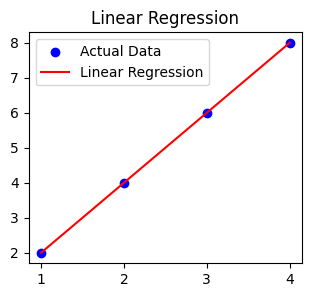

In [20]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.scatter(x,y, color="blue", label="Actual Data")
plt.plot(x, y_pred_lin, color ='red', label ="Linear Regression")
plt.title("Linear Regression")
plt.legend()

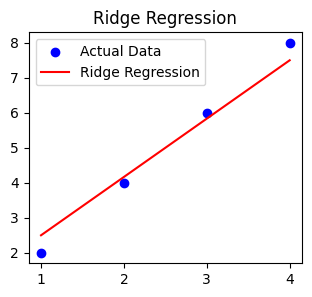

In [21]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.scatter(x,y, color="blue", label="Actual Data")
plt.plot(x, y_pred_ridge, color ='red', label ="Ridge Regression")
plt.title("Ridge Regression")
plt.legend()

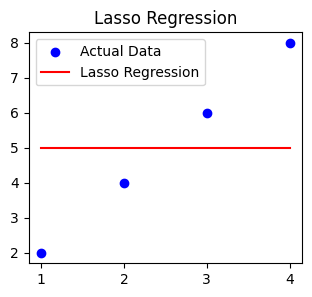

In [22]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.scatter(x,y, color="blue", label="Actual Data")
plt.plot(x, y_pred_lasso, color ='red', label ="Lasso Regression")
plt.title("Lasso Regression")
plt.legend()

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures (degree=15)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.fit_transform(x_test)

poly_model = LinearRegression()
poly_model.fit(x_poly_train, y_train)


y_poly_pred_train = poly_model.predict(x_poly_train)
y_poly_pred_test = poly_model.predict(x_poly_test)

x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_range_pred = poly_model.predict(x_range_poly)

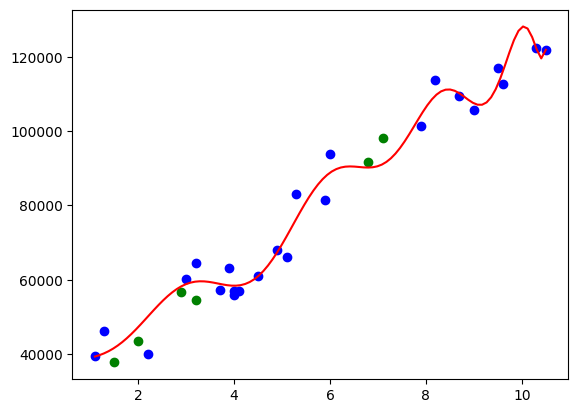

In [25]:
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.scatter(x_test, y_test, color='green', label='Test data')

plt.plot(x_range, y_range_pred, color='red', label='Polynomial Regression (degree=15)')